In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class MLP:
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
    """
    Perceptrón Multicapa con una capa oculta
    """
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    
    # Inicializar pesos aleatoriamente
    self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.5
    self.b2 = np.zeros((1, self.output_size))
    
    # Para guardar el historial de pérdidas
    self.loss_history = []
  
  def sigmoid(self, x):
    """Función de activación sigmoid"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
  
  def sigmoid_derivative(self, x):
    """Derivada de la función sigmoid"""
    return x * (1 - x)
  
  def forward(self, X):
    """Propagación hacia adelante"""
    # Capa oculta
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.sigmoid(self.z1)
    
    # Capa de salida
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = self.sigmoid(self.z2)
    
    return self.a2
  
  def backward(self, X, y, output):
    """Retropropagación"""
    m = X.shape[0]
    
    # Calcular gradientes para la capa de salida
    dz2 = output - y
    dW2 = (1/m) * np.dot(self.a1.T, dz2)
    db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
    
    # Calcular gradientes para la capa oculta
    dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
    dW1 = (1/m) * np.dot(X.T, dz1)
    db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
    
    # Actualizar pesos y sesgos
    self.W2 -= self.learning_rate * dW2
    self.b2 -= self.learning_rate * db2
    self.W1 -= self.learning_rate * dW1
    self.b1 -= self.learning_rate * db1
  
  def compute_loss(self, y_true, y_pred):
    """Calcular pérdida (error cuadrático medio)"""
    return np.mean((y_true - y_pred) ** 2)
  
  def train(self, X, y, epochs=1000, verbose=True):
    """Entrenar la red neuronal"""
    for epoch in range(epochs):
      # Propagación hacia adelante
      output = self.forward(X)
      
      # Calcular pérdida
      loss = self.compute_loss(y, output)
      self.loss_history.append(loss)
      
      # Retropropagación
      self.backward(X, y, output)
      
      # Mostrar progreso
      if verbose and epoch % 100 == 0:
        print(f"Época {epoch}, Pérdida: {loss:.6f}")
  
  def predict(self, X):
    """Hacer predicciones"""
    output = self.forward(X)
    return (output > 0.5).astype(int)
  
  def predict_proba(self, X):
    """Obtener probabilidades"""
    return self.forward(X)

=== PREPARACIÓN DE DATOS ===
Clases seleccionadas: ['setosa' 'versicolor']
Variables seleccionadas: longitud y ancho del sépalo
Tamaño del dataset: 100 muestras, 2 características
Datos de entrenamiento: 70 muestras
Datos de prueba: 30 muestras

=== ENTRENAMIENTO DEL MLP ===
Época 0, Pérdida: 0.221474
Época 100, Pérdida: 0.102275
Época 200, Pérdida: 0.040742
Época 300, Pérdida: 0.020013
Época 400, Pérdida: 0.012012
Época 500, Pérdida: 0.008178
Época 600, Pérdida: 0.006024
Época 700, Pérdida: 0.004676
Época 800, Pérdida: 0.003766
Época 900, Pérdida: 0.003117

=== EVALUACIÓN EN DATOS DE PRUEBA ===
Accuracy: 1.0000

Matriz de Confusión:
[[15  0]
 [ 0 15]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1

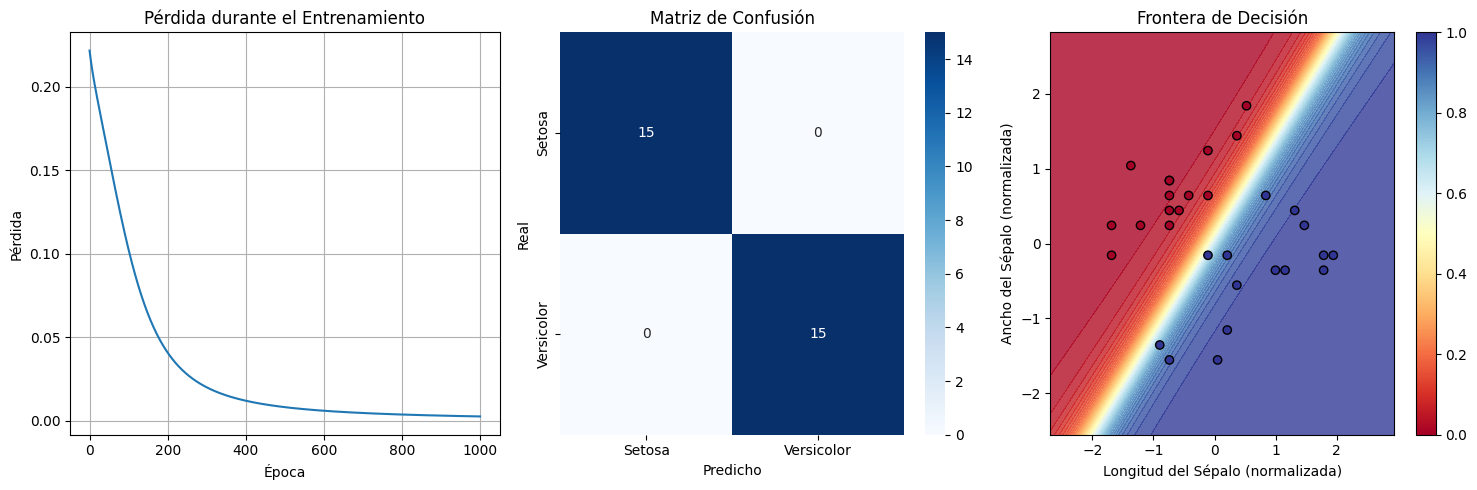


=== DETALLES DE LA ARQUITECTURA ===
Capa de entrada: 2 neuronas
Capa oculta: 5 neuronas
Capa de salida: 1 neurona
Tasa de aprendizaje: 0.1
Función de activación: Sigmoid
Épocas de entrenamiento: 1000


In [3]:
# Cargar y preparar datos del dataset Iris
print("=== PREPARACIÓN DE DATOS ===")
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Seleccionar solo 2 clases (setosa y versicolor)
df_filtered = df[df['species'].isin([0, 1])].copy()

# Seleccionar 2 variables numéricas (longitud y ancho del sépalo)
X = df_filtered[['sepal length (cm)', 'sepal width (cm)']].values
y = df_filtered['species'].values

print(f"Clases seleccionadas: {iris.target_names[[0, 1]]}")
print(f"Variables seleccionadas: longitud y ancho del sépalo")
print(f"Tamaño del dataset: {X.shape[0]} muestras, {X.shape[1]} características")

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Preparar las etiquetas para el formato de la red (one-hot encoding simplificado)
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

print("\n=== ENTRENAMIENTO DEL MLP ===")
# Crear y entrenar el MLP
mlp = MLP(input_size=2, hidden_size=5, output_size=1, learning_rate=0.1)
mlp.train(X_train_scaled, y_train_reshaped, epochs=1000, verbose=True)

print("\n=== EVALUACIÓN EN DATOS DE PRUEBA ===")
# Hacer predicciones en datos de prueba
y_pred = mlp.predict(X_test_scaled)
y_pred_proba = mlp.predict_proba(X_test_scaled)

# Aplanar para matriz de confusión
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()

# Calcular accuracy
accuracy = np.mean(y_pred_flat == y_test_flat)
print(f"Accuracy: {accuracy:.4f}")

# Crear matriz de confusión
cm = confusion_matrix(y_test_flat, y_pred_flat)
print("\nMatriz de Confusión:")
print(cm)

# Mostrar reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_flat, y_pred_flat, 
                          target_names=['Setosa', 'Versicolor']))

# Visualizaciones
plt.figure(figsize=(15, 5))

# Gráfico 1: Pérdida durante el entrenamiento
plt.subplot(1, 3, 1)
plt.plot(mlp.loss_history)
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid(True)

# Gráfico 2: Matriz de confusión
plt.subplot(1, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor'],
            yticklabels=['Setosa', 'Versicolor'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

# Gráfico 3: Datos y frontera de decisión
plt.subplot(1, 3, 3)
# Crear malla para mostrar frontera de decisión
h = 0.02
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict_proba(mesh_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], 
                     c=y_test_flat, cmap='RdYlBu', edgecolors='black')
plt.colorbar(scatter)
plt.title('Frontera de Decisión')
plt.xlabel('Longitud del Sépalo (normalizada)')
plt.ylabel('Ancho del Sépalo (normalizada)')

plt.tight_layout()
plt.show()

print("\n=== DETALLES DE LA ARQUITECTURA ===")
print(f"Capa de entrada: {mlp.input_size} neuronas")
print(f"Capa oculta: {mlp.hidden_size} neuronas")
print(f"Capa de salida: {mlp.output_size} neurona")
print(f"Tasa de aprendizaje: {mlp.learning_rate}")
print(f"Función de activación: Sigmoid")
print(f"Épocas de entrenamiento: 1000")